In [3]:
from sklearn.decomposition import PCA
import numpy as num
import matplotlib.pyplot as plt

In [4]:
def gen_data(sigma_x,sigma_y,sigma_xy,n_points):
    mean = [0, 0]
    if sigma_xy>sigma_x or sigma_xy>sigma_y:
        sigma_xy=num.min([sigma_x,sigma_y])
    cov = [[sigma_x, sigma_xy], [sigma_xy, sigma_y]]
    X = num.random.multivariate_normal(mean,cov,n_points)
    return X

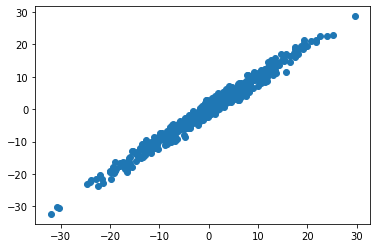

In [5]:
sigma_x=100
sigma_y=100
sigma_xy=99
n_points=500
X=gen_data(sigma_x,sigma_y,sigma_xy,n_points)
plt.scatter(X[:,0],X[:,1])

In [6]:
def pca(X):
    N,M=num.shape(X)
    Cov = (1/N)*num.dot(X,X.T)
    D,V = num.linalg.eigh(Cov)
    D=D[num.argsort(D)]
    V=V[:,num.argsort(D)]
    return D,V

def pca_transformation(X,ncproj):
    X=(X - num.mean(X,axis=0)).T
    ncomp, mcomp = num.shape(X)
    if ncproj>ncomp:
        ncproj=ncomp
    D,V = pca(X)
    V = V[:,-ncproj:]
    D = D[-ncproj:]
    W = num.dot(V.T,X)
    WD = num.dot(V,W)
    return W,WD,V

In [7]:
ncproj=1
W,WD,V=pca_transformation(X,ncproj)
print(V)

[[-0.7095404 ]
 [-0.70466475]]


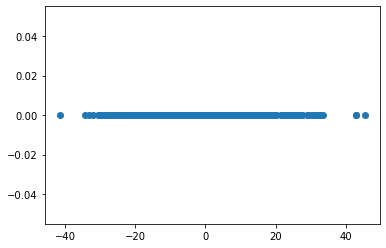

In [8]:
if ncproj==1:
    plt.scatter(W[0,:],num.zeros(num.size(W[0,:])))
else:
    plt.scatter(W[0,:],W[1,:])

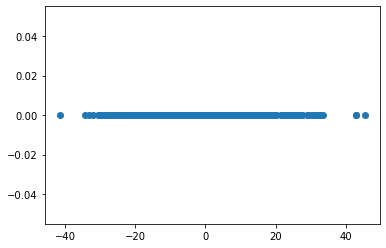

In [9]:
plt.scatter(W[0,:],num.zeros(num.size(W[0,:])))

In [10]:
if ncproj!=1:
    plt.scatter(W[1,:],num.zeros(num.size(W[1,:])))

(-35.3013948583208, 32.7672192117285, -35.433206777796414, 32.28414526996025)

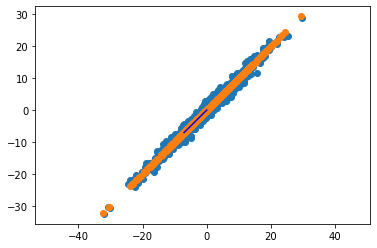

In [11]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(WD[0,:],WD[1,:])
if ncproj==1:
    plt.plot([0,V[0,0]*10],[0,V[1,0]*10],'b')
else:
    plt.plot([0,V[0,0]*10],[0,V[0,1]*10],'b')
    plt.plot([0,V[1,0]*10],[0,V[1,1]*10],'b')
plt.axis('equal')

In [12]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca=pca.transform(X)
#plt.scatter(X_pca[:,0],X_pca[:,1],alpha=0.2)
#plt.xlim([-50,50])
#plt.ylim([-30,30])
print(pca.components_[:,0])

[-0.7095404]


(-35.429909597522595, 32.7733389612143, -35.42712908053522, 32.15651362747517)

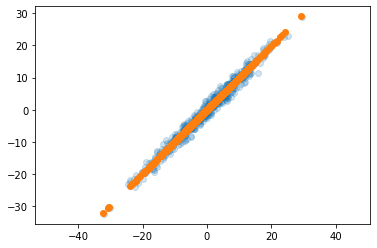

In [13]:
Y=num.dot(pca.components_,X.T)
Y=num.dot(pca.components_.T,Y)
plt.scatter(X[:,0],X[:,1],alpha=0.2)
plt.scatter(Y[0,:],Y[1,:])
plt.axis('equal')

(-35.17177938555965, 32.76104704635892, -35.407623923697486, 31.7469053338827)

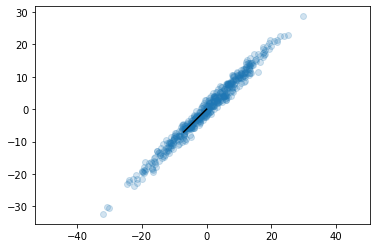

In [14]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
if num.size(pca.components_)==2:
    plt.plot([0,pca.components_[0,0]*10],[0,pca.components_[0,1]*10],'black')
else:
    plt.plot([0,pca.components_[0,0]*10],[0,pca.components_[0,1]*10],'black')
    plt.plot([0,pca.components_[1,0]*10],[0,pca.components_[1,1]*10],'black')
plt.axis('equal')